In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import random
import datetime

**1.  Load and Preprocess the Dataset**

In [46]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../dataset/heart.csv')

# Display the first few rows
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [47]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [48]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

In [49]:
# Scale numeric features
scaler = StandardScaler()
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,0,1,False,False,True,False,False,False,False,True,False,False
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,0,1,False,True,False,True,False,False,False,False,True,False
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,0,1,True,False,False,False,False,False,True,False,True,False
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,0,1,True,False,False,True,False,False,True,False,True,False
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,0,1,False,False,False,True,False,False,True,False,True,False


**2. Data Visualization of Long-Term Trends**


***2.1. Correlation Matrix of Features***

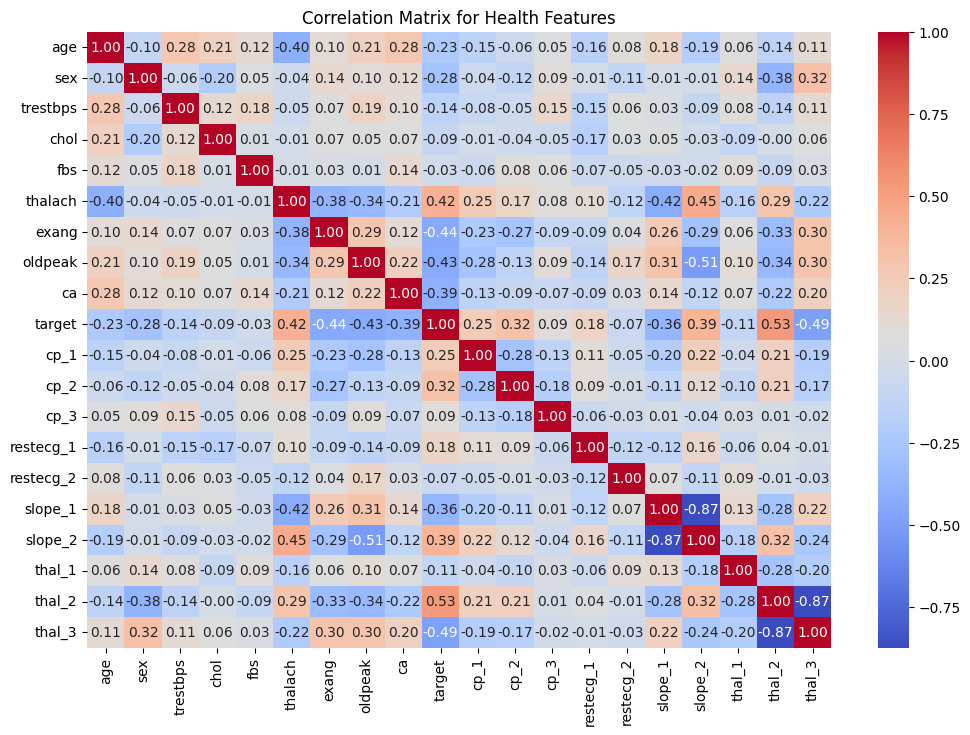

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix for Health Features")
plt.show()


***2.2. Risk by Age Bucket (Simulating Long-Term Trend)***

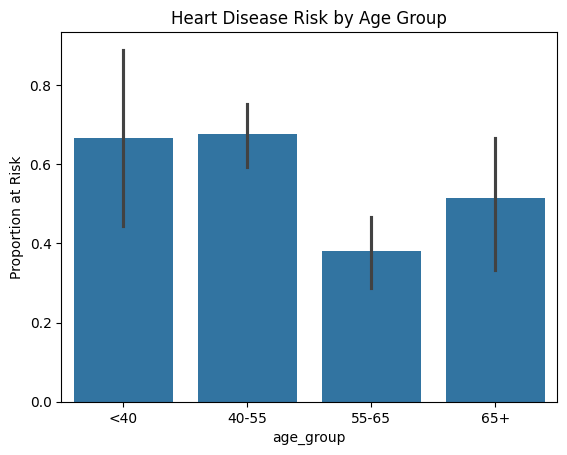

In [51]:
# Create age groups to simulate baseline risk
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 55, 65, 80], labels=['<40', '40-55', '55-65', '65+'])

# Plot heart disease occurrence by age group
sns.barplot(x='age_group', y='target', data=data)
plt.title("Heart Disease Risk by Age Group")
plt.ylabel("Proportion at Risk")
plt.show()


**3. Predictive Model for Long-Term Risk**

In [52]:
X = data_encoded.drop("target", axis=1)
y = data_encoded["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



***3.1. Trend Analysis with Time Windows (Simulated data integrated)***

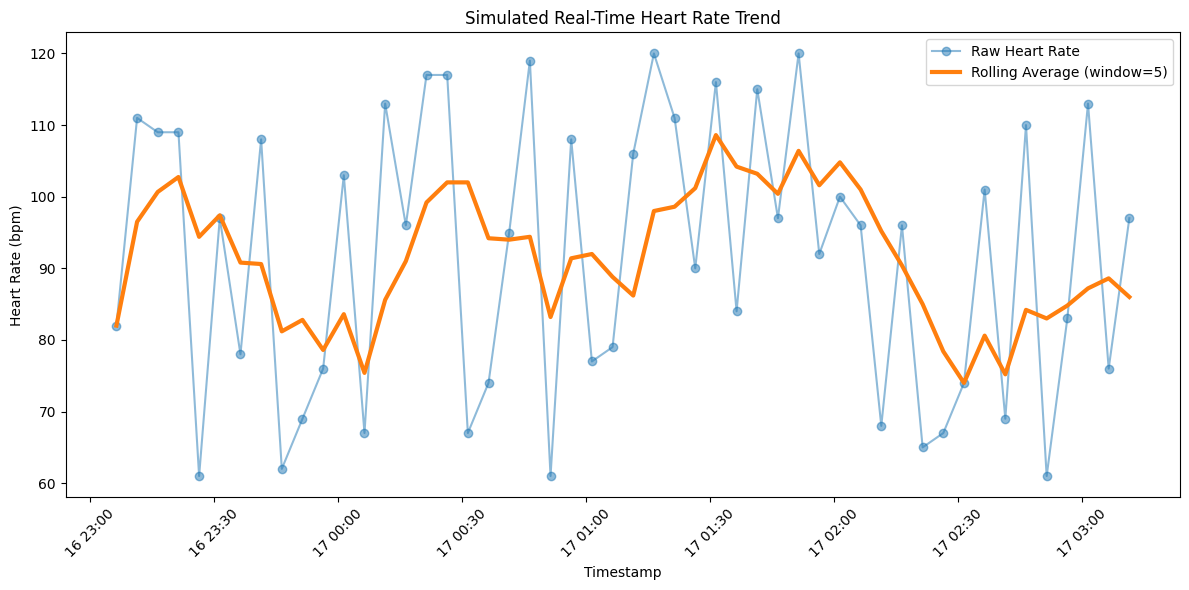

,timestamp,heart_rate,oxygen_saturation,temperature,activity_level,heart_rate_avg
0,2025-04-16 23:06:22.934270,82,91,36.6,running,82.000000
1,2025-04-16 23:11:22.934270,111,95,37.7,resting,96.500000
2,2025-04-16 23:16:22.934270,109,94,37.1,resting,100.666667
3,2025-04-16 23:21:22.934270,109,96,38.1,resting,102.750000
4,2025-04-16 23:26:22.934270,61,98,38.4,resting,94.400000


In [53]:
# Simulate a long-term trend analysis: Aggregate simulated live data over time windows


def generate_extended_live_data(n=50):
    stream = []
    base_time = datetime.datetime.now()
    for i in range(n):
        simulated_time = base_time + datetime.timedelta(minutes=i*5)
        stream.append({
            "timestamp": simulated_time,
            "heart_rate": random.randint(60, 120),
            "oxygen_saturation": random.randint(90, 100),
            "temperature": round(random.uniform(36.0, 38.5), 1),
            "activity_level": random.choice(["resting", "walking", "running"])
        })
    return stream

extended_live_stream = generate_extended_live_data(50)
extended_live_df = pd.DataFrame(extended_live_stream)

# Create a rolling window average for heart rate to simulate trend analysis
extended_live_df['heart_rate_avg'] = extended_live_df['heart_rate'].rolling(window=5, min_periods=1).mean()

# Plot the trend of heart rate over time
plt.figure(figsize=(12,6))
plt.plot(extended_live_df['timestamp'], extended_live_df['heart_rate'], label="Raw Heart Rate", alpha=0.5, marker='o')
plt.plot(extended_live_df['timestamp'], extended_live_df['heart_rate_avg'], label="Rolling Average (window=5)", linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (bpm)")
plt.title("Simulated Real-Time Heart Rate Trend")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display first few rows of the extended live data for inspection
extended_live_df.head()


***3.2. Compute Baseline Health Indices for an Individual User***

In [54]:
# Compute baseline indices for an individual user using the extended live data simulation.


# Select the key vital parameters to compute the baseline indices
vital_columns = ['heart_rate', 'oxygen_saturation', 'temperature']

# Compute baseline statistics: mean, standard deviation, min, and max for these vitals.
baseline_indices = extended_live_df[vital_columns].agg(['mean', 'std', 'min', 'max']).T
baseline_indices.columns = ['Mean', 'Std Dev', 'Minimum', 'Maximum']

print("Baseline Health Indices for the User (Simulated):")
baseline_indices


Baseline Health Indices for the User (Simulated):


,Mean,Std Dev,Minimum,Maximum
heart_rate,91.64,19.313483,61.0,120.0
oxygen_saturation,95.02,2.951928,90.0,100.0
temperature,37.21,0.797253,36.0,38.4


**4. Live Data Collected by Apple Watch and simulation**


***4.1. Real-Time Vitals Generator***

In [59]:
def simulate_live_data(n):
    try:
        # Attempt to load the Apple Watch CSV file
        df = pd.read_csv("./heartrate_applewatch.csv")
        # Ensure the 'timestamp' column is converted to datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        # Sort the dataframe by timestamp descending to get the latest entries
        df = df.sort_values(by='timestamp', ascending=False)
        
        if len(df) >= n:
            # If there are at least n rows available, take the latest n rows
            sampled_df = df.head(n)
        else:
            # Not enough rows in CSV; use what is available and generate simulated rows for the remainder
            sampled_df = df.copy()
            print(f"Only {len(df)} rows available from Apple Watch CSV; need {n} rows. Generating simulated rows for the remaining.")
            missing_n = n - len(df)
            simulated_rows = []
            base_time = datetime.datetime.now()
            for i in range(missing_n):
                simulated_rows.append({
                    "timestamp": base_time + datetime.timedelta(minutes=i),
                    "heart_rate": random.randint(60, 120)
                })
            simulated_df = pd.DataFrame(simulated_rows)
            # Append the simulated rows to the sampled dataframe
            sampled_df = pd.concat([sampled_df, simulated_df], ignore_index=True)
        
        # To ensure chronological order, sort sampled_df by timestamp ascending
        sampled_df = sampled_df.sort_values(by='timestamp', ascending=True)
        
        # Construct the final live data by simulating additional fields
        live_data = []
        for _, row in sampled_df.iterrows():
            live_data.append({
                "timestamp": row['timestamp'],
                "heart_rate": int(row['heart_rate']),
                "oxygen_saturation": random.randint(90, 100),
                "blood_pressure": random.randint(120, 190),
                "temperature": round(random.uniform(36.0, 38.5), 1),
                "activity_level": random.choice(["resting", "walking", "running"])
            })
        return live_data
    except Exception as e:
        print("Error loading Apple Watch CSV data; falling back to simulation. Error:", e)
        # Fallback: simulate n rows entirely
        stream = []
        base_time = datetime.datetime.now()
        for i in range(n):
            stream.append({
                "timestamp": base_time + datetime.timedelta(minutes=i),
                "heart_rate": random.randint(60, 120),
                "oxygen_saturation": random.randint(90, 100),
                "blood_pressure": random.randint(120, 190),
                "temperature": round(random.uniform(36.0, 38.5), 1),
                "activity_level": random.choice(["resting", "walking", "running"])
            })
        return stream

# Generate a stream of 20 live data points
live_stream = simulate_live_data(20)
live_df = pd.DataFrame(live_stream)
live_df

Error loading Apple Watch CSV data; falling back to simulation. Error: [Errno 2] No such file or directory: './heartrate_applewatch.csv'


,timestamp,heart_rate,oxygen_saturation,blood_pressure,temperature,activity_level
0,2025-04-16 23:07:05.245745,92,97,141,36.6,resting
1,2025-04-16 23:08:05.245745,89,93,152,37.1,running
2,2025-04-16 23:09:05.245745,108,98,169,36.0,walking
3,2025-04-16 23:10:05.245745,114,96,146,36.8,walking
4,2025-04-16 23:11:05.245745,112,100,183,37.2,running
5,2025-04-16 23:12:05.245745,114,95,121,37.8,resting
6,2025-04-16 23:13:05.245745,96,100,163,38.2,resting
7,2025-04-16 23:14:05.245745,97,97,145,36.8,walking
8,2025-04-16 23:15:05.245745,117,97,157,36.5,resting
9,2025-04-16 23:16:05.245745,110,93,143,36.2,walking


***4.2.Real-Time Anomaly Detection Using Individual Baselines and Clinical Thresholds***

In [61]:
def detect_combined_anomalies(row, baseline_indices):
    """
    Check a live reading for anomalies using both clinical thresholds and baseline deviation.
    The clinical thresholds for heart_rate change based on the activity level.
    
    Args:
        row (pd.Series): A row representing a live data record.
        baseline_indices (DataFrame): A DataFrame containing baseline statistics for each vital.
        
    Returns:
        list: A combined list of alerts triggered by either method.
    """
    alerts = []
    
    # Define activity-dependent clinical thresholds for heart rate.
    # You can adjust these thresholds as needed.
    activity = row["activity_level"]
    hr_thresholds = {"resting": 110, "walking": 120, "running": 130}
    hr_threshold = hr_thresholds.get(activity, 110)
    
    # Clinical threshold checks:
    if row["heart_rate"] > hr_threshold:
        alerts.append(f"High Heart Rate ({row['heart_rate']} bpm) while {activity}")
    if row["oxygen_saturation"] < 93:
        alerts.append(f"Low O2 Level ({row['oxygen_saturation']}%)")
    if row["temperature"] > 37.8:
        alerts.append(f"High Body Temp ({row['temperature']}°C)")
    
    # Baseline anomaly detection using 1 standard deviation:
    for vital in ['heart_rate', 'oxygen_saturation', 'temperature']:
        if vital in baseline_indices.index:
            base = baseline_indices.loc[vital]
            mean_val = base['Mean']
            std_val  = base['Std Dev']
            lower_threshold = mean_val - std_val
            upper_threshold = mean_val + std_val
            
            # Add a baseline alert if outside the normal range
            if row[vital] < lower_threshold:
                alerts.append(f"{vital} too low: {row[vital]:.1f} (< {lower_threshold:.1f})")
            elif row[vital] > upper_threshold:
                alerts.append(f"{vital} too high: {row[vital]:.1f} (> {upper_threshold:.1f})")
    
    return alerts

# Apply the combined anomaly detection to the live data stream
live_df["combined_alerts"] = live_df.apply(lambda row: detect_combined_anomalies(row, baseline_indices), axis=1)
live_df

,timestamp,heart_rate,oxygen_saturation,blood_pressure,temperature,activity_level,combined_alerts
0,2025-04-16 23:07:05.245745,92,97,141,36.6,resting,[]
1,2025-04-16 23:08:05.245745,89,93,152,37.1,running,[]
2,2025-04-16 23:09:05.245745,108,98,169,36.0,walking,"[oxygen_saturation too high: 98.0 (> 98.0), te..."
3,2025-04-16 23:10:05.245745,114,96,146,36.8,walking,[heart_rate too high: 114.0 (> 111.0)]
4,2025-04-16 23:11:05.245745,112,100,183,37.2,running,"[heart_rate too high: 112.0 (> 111.0), oxygen_..."
5,2025-04-16 23:12:05.245745,114,95,121,37.8,resting,"[High Heart Rate (114 bpm) while resting, hear..."
6,2025-04-16 23:13:05.245745,96,100,163,38.2,resting,"[High Body Temp (38.2°C), oxygen_saturation to..."
7,2025-04-16 23:14:05.245745,97,97,145,36.8,walking,[]
8,2025-04-16 23:15:05.245745,117,97,157,36.5,resting,"[High Heart Rate (117 bpm) while resting, hear..."
9,2025-04-16 23:16:05.245745,110,93,143,36.2,walking,[temperature too low: 36.2 (< 36.4)]


**5. Output**

***5.1. Output of Real-time Alert Based on Live-data***

In [62]:
for index, row in live_df.iterrows():
    timestamp_str = row['timestamp'].strftime('%H:%M:%S')
    alert_msg = ', '.join(row['combined_alerts']) if row['combined_alerts'] else "Vitals Normal"
    print(f"[{timestamp_str}] - Alerts: {alert_msg}")



[23:07:05] - Alerts: Vitals Normal
[23:08:05] - Alerts: Vitals Normal
[23:09:05] - Alerts: oxygen_saturation too high: 98.0 (> 98.0), temperature too low: 36.0 (< 36.4)
[23:10:05] - Alerts: heart_rate too high: 114.0 (> 111.0)
[23:11:05] - Alerts: heart_rate too high: 112.0 (> 111.0), oxygen_saturation too high: 100.0 (> 98.0)
[23:12:05] - Alerts: High Heart Rate (114 bpm) while resting, heart_rate too high: 114.0 (> 111.0)
[23:13:05] - Alerts: High Body Temp (38.2°C), oxygen_saturation too high: 100.0 (> 98.0), temperature too high: 38.2 (> 38.0)
[23:14:05] - Alerts: Vitals Normal
[23:15:05] - Alerts: High Heart Rate (117 bpm) while resting, heart_rate too high: 117.0 (> 111.0)
[23:16:05] - Alerts: temperature too low: 36.2 (< 36.4)
[23:17:05] - Alerts: Vitals Normal
[23:18:05] - Alerts: Low O2 Level (92%), High Body Temp (38.1°C), heart_rate too low: 69.0 (< 72.3), oxygen_saturation too low: 92.0 (< 92.1), temperature too high: 38.1 (> 38.0)
[23:19:05] - Alerts: Low O2 Level (91%), h

***5.2. Output Health Issues Report Based on Long-term Data***

In [63]:
# Linking with Long-Term Model
# Random example input from test set
sample_user = X_test.iloc[0:1]
prediction = model.predict(sample_user)
risk = "High Risk" if prediction[0] == 1 else "Low Risk"

print(f"Long-Term Prediction for this User: {risk} on heart disease.")


Long-Term Prediction for this User: Low Risk on heart disease.
